# Assignment1

2021021699 Yuwon Lee<br>
2021021581 Jinha Lim<br>
2021021580 Shinhye Lee

## Rendering a Lambertian sphere

In [1]:
import numpy as np
import matplotlib.pyplot as plt

By using the spherical coordinate system, the coordinate is defined as $(r, \theta, \phi)$. The point in the spehre is denoted as P<br>
- $r$: The distance from the origin to P
- $\theta$: Angle from the positive direction of the z-axis to the straight line formed by the origin and P
- $\phi$: Angle from the positive direction of the x-axis to the straight line formed by the origin and P projected onto the xy-plane

In the spherical coordinate system, there is a case of one coordinate denoting several points, so it normally limits the range of variables.<br>
- $r \ge 0$
- $0\le\theta\le\pi$
- $0\le\phi\lt 2\pi$

Transforming the spherical cooridante system to orthogonal coordinate system
- $x = r\sin\theta\cos\phi$
- $y = r\sin\theta\sin\phi$
- $z = \sqrt{r^2-x^2-y^2}$ , &ensp; ($z=z(x,y)$)

In [2]:
# Setting the radius value to 80 given in the problem
r = 80
# Setting the cooridnates using spherical coordinate system
# theta , phi = np.mgrid[0:np.pi:50j, 0:2 * np.pi:100j]
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2* np.pi, 100)
# Setting the illumination vecotr to (0.12, 0, 0.86) given in the probelm
light_vector = np.array([0.12, 0, 0.96])

In [3]:
# Calculating the coordinates
# Need to use outer product to calculate all of cases of phi and theta
x = r * np.outer(np.sin(theta), np.cos(phi))
y = r * np.outer(np.sin(theta), np.sin(phi))
# Setting the z-value using z=z(x,y)
z_square = np.power(r,2) - np.power(x,2) - np.power(y,2)
z = np.sqrt(z_square)
# To use only the positive hemishpere it only uses the half of the coordinates
x = x[:25,:]
y = y[:25,:]
z = z[:25,:]

The normal vector for each point can be derived from partial derivatives of sphere parametrization.<br>
It is given in the problem as $[n_x=-\frac{\partial z(x,y)}{\partial x}, n_y=-\frac{\partial z(x,y)}{\partial y}, n_z=1]$<br>
$n_x = - \frac{x}{\sqrt{r^2-x^2-y^2}}$ , $n_y = - \frac{y}{\sqrt{r^2-x^2-y^2}}$<br>
$\therefore n_x = \frac{x}{z}, n_y = \frac{y}{z}$


In [4]:
# Given in the problem, calculating the normal vectors
n_x = x / z
n_y = y / z
n_z = np.ones(n_y.shape)

According to the cosine-law, the intensity at each point is the dot-product of the normal of the surface with the lighting direction.<br>
$I=<\overrightarrow{N}, \overrightarrow{L}> = ||\overrightarrow{N}||||\overrightarrow{L}||\cos(\theta)$

In [5]:
# Calculating the intensity vectors
# Each coordinates are 2d-array, and each value is representing each cooridnate.
intensity = np.zeros(n_x.shape)
for i in range(n_x.shape[0]):
    for j in range(n_x.shape[1]):
        temp = [n_x[i][j], n_y[i][j], n_z[i][i]]
        intensity[i][j] = np.dot(temp, light_vector)

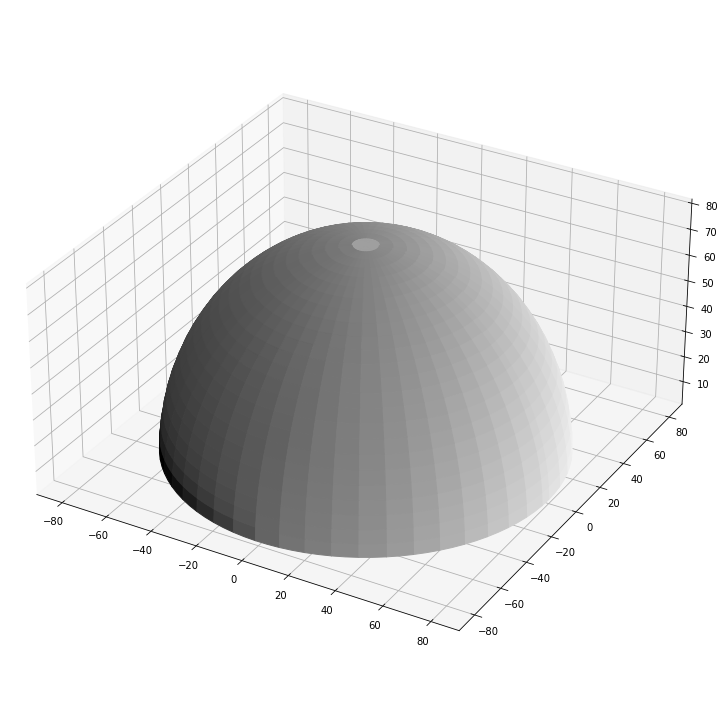

In [6]:
# Plotting the hemishpere using calculated values
plt.rcParams["figure.figsize"] = [10.0, 10.0]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((1,1,0.5))
sphere = ax.plot_surface(x,y,z, facecolors=plt.cm.gray(intensity))
plt.show()